### Dataset name is "California Housing Prices" 
##### (https://www.kaggle.com/datasets/camnugent/california-housing-prices)
##### Model 2. In this model we will use coordinates (longitude and latitude) instead of "ocean_proximity". We will compare outcomes of all 3 models in the end.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
 # load data 
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Cleaning up the dataset: ###

##### Below I will repeat the data cleaning as we did in the other models:

In [4]:
# As it was mentioned, I will not use "ocean_proximity" column. I will drop it:
# I will drop it later as I need this column for coordinate visualization.
#df = df.drop("ocean_proximity", axis=1)

In [5]:
# checking missing values
# only total beds column has missing value. Compare to total amount of rows, this is not a significant number.
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# let's drop all missing values for total_beds column:
df = df.dropna(axis=0)

In [7]:
# no missing values anymore:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# there is no dublicates:
int(df.duplicated().sum())

0

### Visualising the Data.
#### Now we will check the correlation between the features against each other and check distribution:

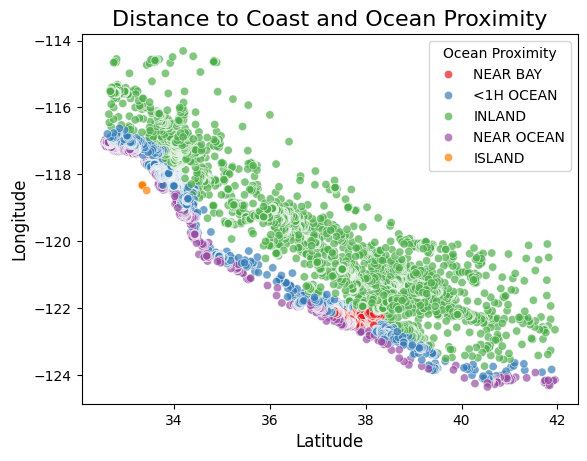

In [9]:
# let's check longitude and latitude, to see how houses are distributed along the coast.
# This plot is very useful as it provides an understanding that houses marked 'NEAR OCEAN' and '<1H OCEAN' are distributed along the coast. 
# They are not concentrated near a any pecific city. However, houses marked 'NEAR BAY' are located in one specific area.
sns.scatterplot(x='latitude', y='longitude', 
                data=df, 
                hue='ocean_proximity',  # Color points by all proximity types
                #size='distance_to_coast_km',  # Scale point size by distance to coast
                sizes=(20, 200),  # Adjust size range for clarity
                palette='Set1',  # Set color palette for ocean proximity categories
                alpha=0.7)  # Transparency for better visualization

# Adding plot title and labels
plt.title('Distance to Coast and Ocean Proximity', fontsize=16)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)

# Show the plot
plt.legend(title='Ocean Proximity')
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

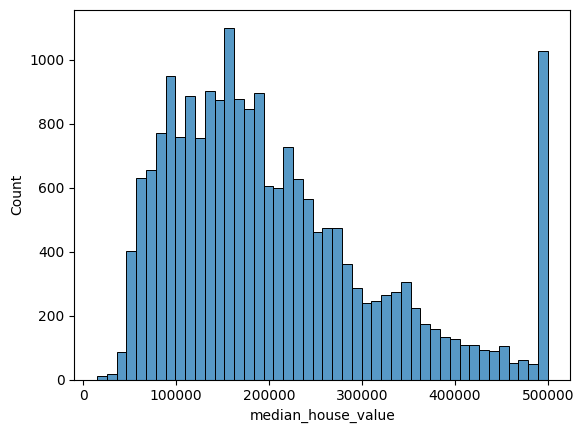

In [10]:
# checking target variable distribution:
# there is a lot of houses more than 500000 and this destroy data distribution very much
# we will need to cut a tail on a right side to get closer to normal distribution:
sns.histplot(df['median_house_value'])

In [11]:
# we will use quantiles to remove the top % in order to get closer to normal distribution
df = df.query("median_house_value < median_house_value.quantile(0.93)")

<Axes: xlabel='median_house_value', ylabel='Count'>

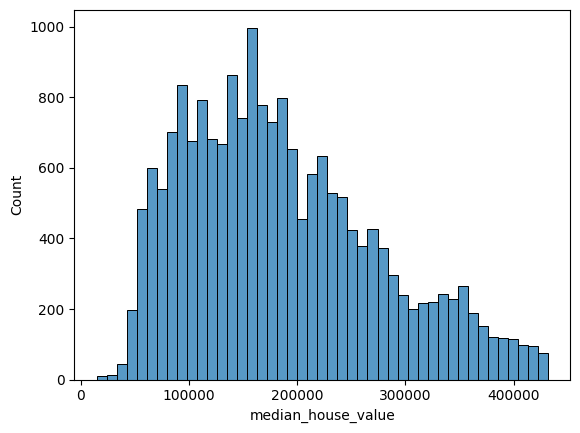

In [12]:
# now it looks better:
sns.histplot(df['median_house_value'])

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: >

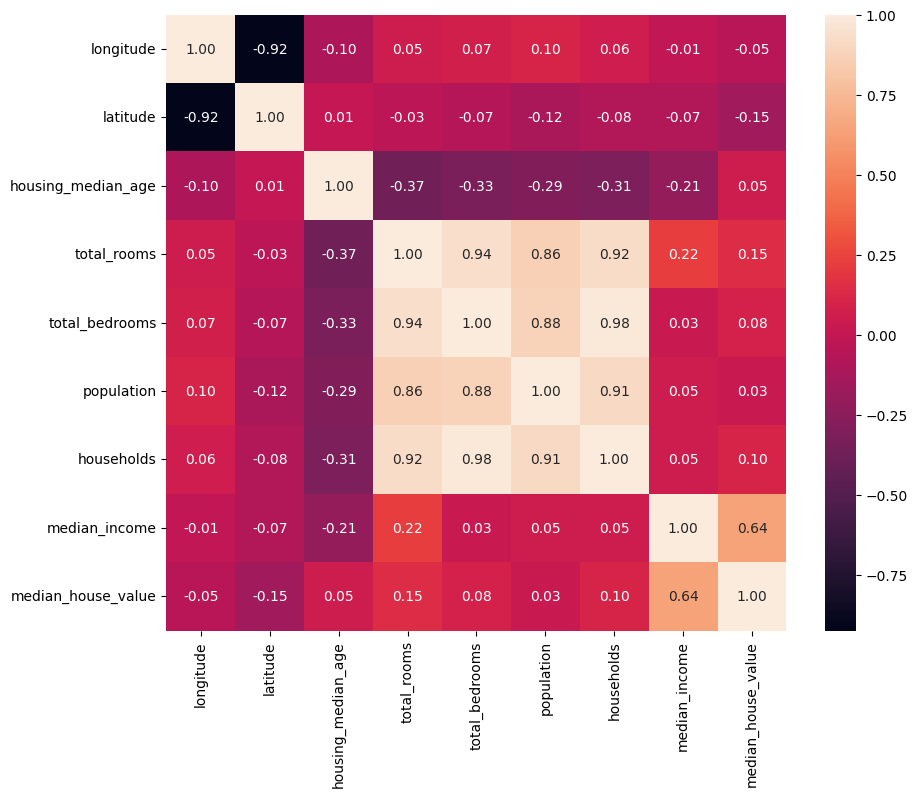

In [14]:
# it was difficult to see numbers, so we will increase the figure size:
plt.figure(figsize=(10, 8))

# on this correlation matrix we can see the most important supported variables:
# median_income. 
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

<Axes: xlabel='median_income', ylabel='Count'>

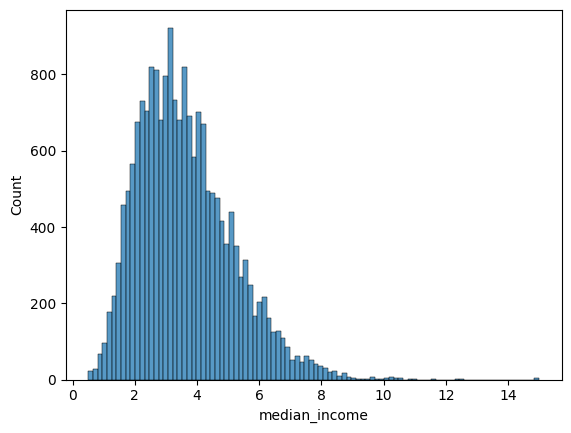

In [15]:
# We must also check distribution of support variables -"median_income". Another variables like:
# "housing_median_age", "total_bedrooms","population" has very poor correlation with target variable.
# I will check what to do better with them: either delete the outliers or drop these columns completely.
# "median_income" distributuion:
sns.histplot(df['median_income'])

In [16]:
# use quantiles to remove the top % in order to remove outliners:
df = df.query("median_income < median_income.quantile(0.99)")

<Axes: xlabel='median_income', ylabel='Count'>

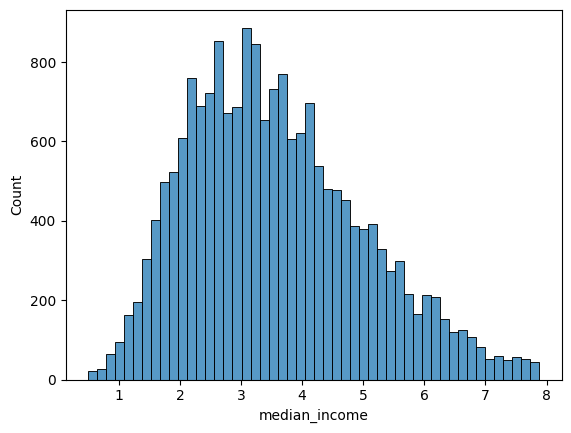

In [17]:
# now it looks like this:
sns.histplot(df['median_income'])

In [18]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Axes: xlabel='housing_median_age', ylabel='Count'>

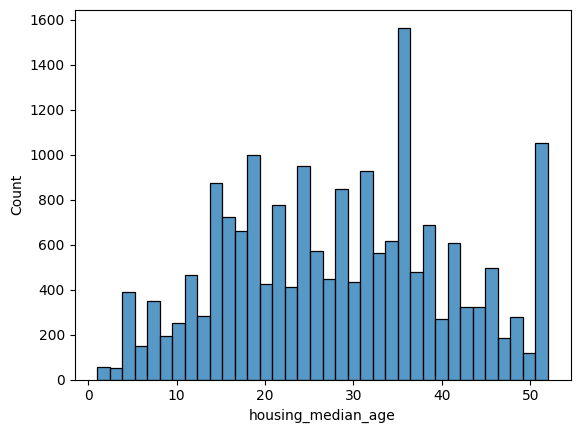

In [19]:
# For support variable
# checking distribution of "housing_median_age"variable:
sns.histplot(df['housing_median_age'])

<Axes: xlabel='total_rooms', ylabel='Count'>

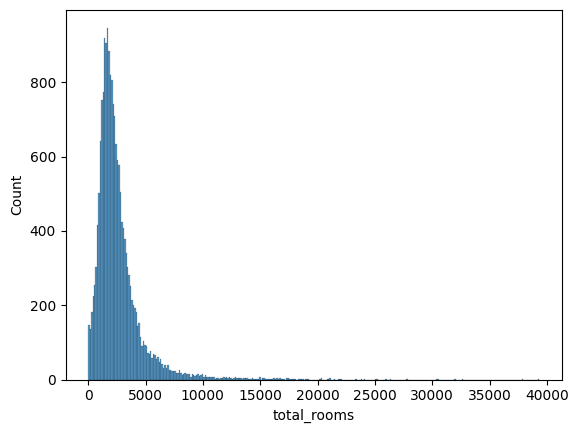

In [20]:
sns.histplot(df['total_rooms'])

<Axes: xlabel='total_bedrooms', ylabel='Count'>

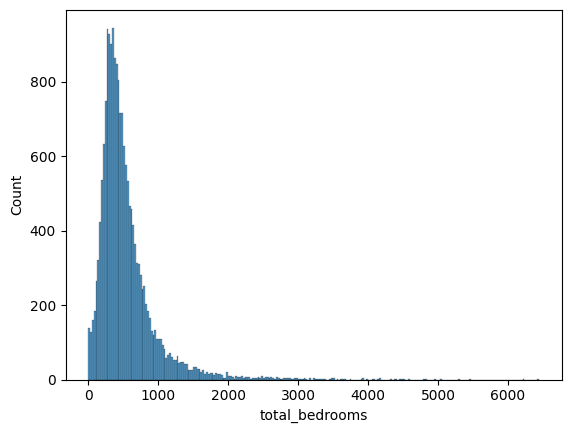

In [21]:
# checking distribution of "total_rooms"variable:
sns.histplot(df['total_bedrooms'])

In [22]:
# use quantiles to remove the top % in order to remove outliners:
df = df.query("total_bedrooms < total_bedrooms.quantile(0.97)")

<Axes: xlabel='total_bedrooms', ylabel='Count'>

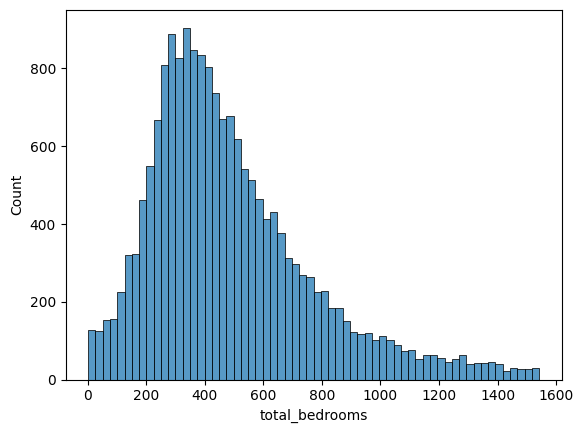

In [23]:
# checking distribution of "total_rooms"variable:
sns.histplot(df['total_bedrooms'])

<Axes: xlabel='population', ylabel='Count'>

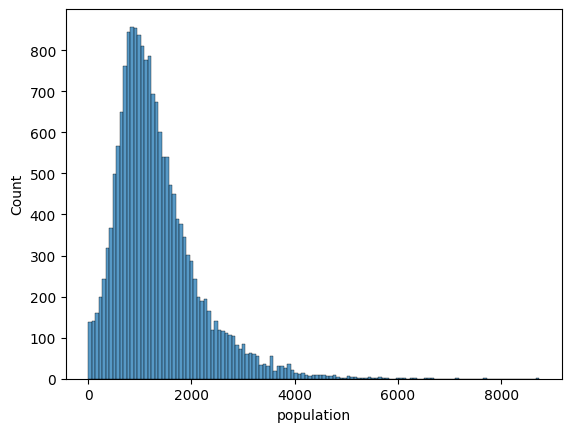

In [24]:
# checking distribution of "total_rooms"variable:
sns.histplot(df['population'])

In [25]:
# use quantiles to remove the top % in order to remove outliners:
df = df.query("population < population.quantile(0.98)")

<Axes: xlabel='population', ylabel='Count'>

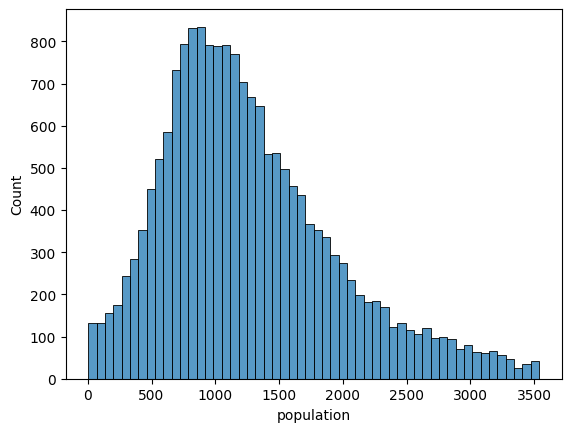

In [26]:
# checking distribution of "total_rooms"variable:
sns.histplot(df['population'])

In [27]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17877.000000,17877.000000,17877.000000,17877.000000,17877.000000,17877.000000,17877.000000,17877.000000,17877.000000
mean,-119.590979,35.693525,28.941377,2283.519438,474.549757,1267.944622,442.481065,3.559328,183448.346814
std,2.005766,2.166446,12.301802,1300.798704,261.843907,683.764451,240.493218,1.421813,87916.489759
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.940000,19.000000,1401.000000,291.000000,782.000000,276.000000,2.488600,113100.000000
50%,-118.590000,34.300000,29.000000,2027.000000,422.000000,1147.000000,398.000000,3.375000,169000.000000
75%,-118.010000,37.740000,37.000000,2902.000000,608.000000,1640.000000,567.000000,4.460900,238600.000000
max,-114.310000,41.950000,52.000000,9662.000000,1542.000000,3540.000000,1509.000000,7.877400,431600.000000


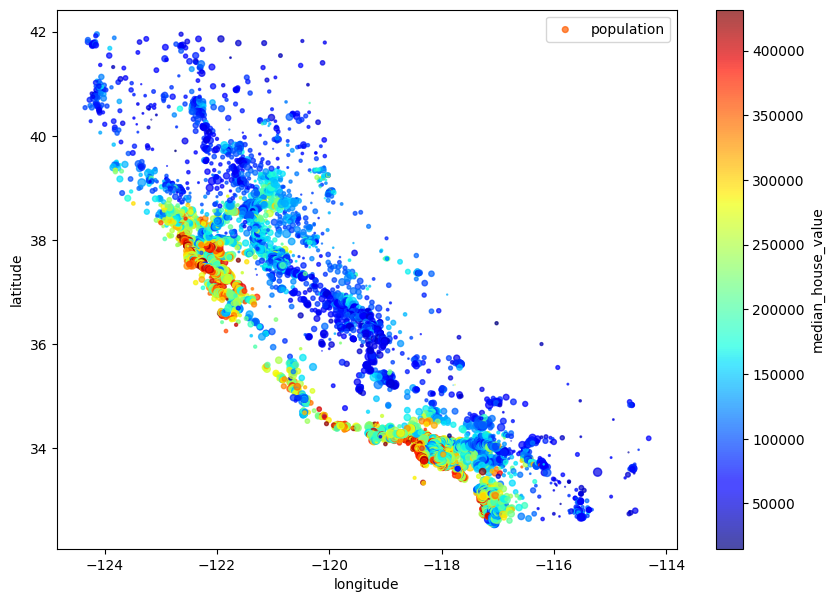

In [28]:
# now we should do something with latitude and longitude.
# On this plot we can see that houses near ocean cost more and we can spot two big cities Los Angeles and San Francisco. 
# Also, there is can be connection between houses value and population,
# => houses value more in high population area, but on heatmap we didn't see correlation between median house value and population.
# There are outliers - cheap houses on coastline.
df.plot(kind="scatter", x="longitude",y="latitude", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['population']/100, label="population", alpha=0.7)
plt.show()

#Ref:"https://medium.com/@basumatary18/implementing-linear-regression-on-california-housing-dataset-378e14e421b7#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImZhMDcyZjc1Nzg0NjQyNjE1MDg3YzcxODJjMTAxMzQxZTE4ZjdhM2EiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMTgyMDUxMTQ5NTgzODQ3NTcwODkiLCJlbWFpbCI6InN2ZXRsYW5hLmVtZGVuQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYmYiOjE3MzgzNTkyNTIsIm5hbWUiOiJTdmV0bGFuYSBFbWRlbi1CYXpoZW5vdmEiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jTDVVOF81dTBRZGk1U0Z0QllIZFJwTFNRSDZkVkxTSTd2ejMxTUZQMTl4YjB0bnB3PXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IlN2ZXRsYW5hIiwiZmFtaWx5X25hbWUiOiJFbWRlbi1CYXpoZW5vdmEiLCJpYXQiOjE3MzgzNTk1NTIsImV4cCI6MTczODM2MzE1MiwianRpIjoiYzA1NDJiMDQ0YTMyODNjYThlN2Q2ZWZiZmRmYmI2NDExNDkxMDY4OSJ9.KE4D73fy_EXA0kP-cJkQAHDdDEp4eazJhRuFk3vIPBg7aC5x5Iia0IfOjjpmjfrVDKFrHOgujPRKVyRZ-cd4_LW2jffKnM4e5ZkzQLk1dpwpiHhZXS9t9h6VMuNRv-a6cEDu0wVR1oCj13sVVSua6sxu2cxvi74kV8dDftV6Ke_ve8XshVWRy2yEm4TBp42MphTQJQWJOlpAoy31CTqM6upLSUnYatnbIfbUVqwwJbyIP7TylHEqPKJHXFduj3Qdhi4edhUYc3pC5ahevpD2Im3kzAqOB3df6A6fRWB5c9Y9OAblTD3tiSYdmwBVDAZkK5fGIXrHD2jcUZ825_ZGQg"

##### **_Option 1_**: coordinates into quadrants- North, South, East, West with logic: if coordinate is grater than  the median latitude -> North = 1, esle -> South = 0, the same with longitude: if coordinate is greater than the median longitude -> East = 1, esle -> West = 0. But how we will use this for our model: "East" doesn’t necessarily mean high prices—it depends on how close the house is to the ocean. **_Option 2_**: calculate distance from a fixed coastal coordinate. For that we already have "ocean_proximity" column, where houses have label "NEAR OCEAN", "NEAR BAY" ect. but we can create one more column "distance_to_coast". It will be more precise data for our model._Option 3_:The same as Option 2, but calculate the distance from houses marked 'NEAR OCEAN,' since we know these houses are located along the coastline. This will be a better solution because Option 2 uses hardcoded coordinates.

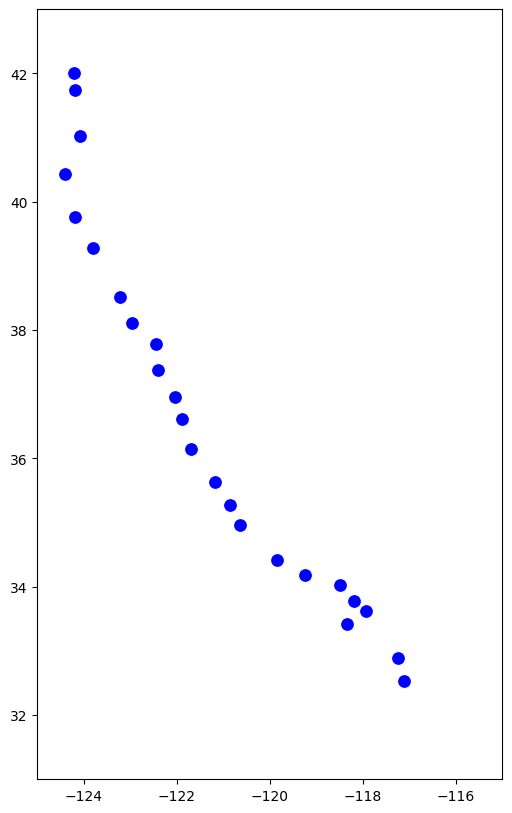

In [29]:
# Let's create coastline reference points and check them with scatterplot
# how them look like (this data taken from Chatgpt):

coastline_points = [
    (32.53, -117.12),  # San Diego
    (32.89, -117.25),  # La Jolla
    (33.42, -118.35),  # Catalina Island
    (33.63, -117.93),  # Newport Beach
    (33.78, -118.20),  # Long Beach
    (34.02, -118.50),  # Santa Monica
    (34.19, -119.24),  # Ventura
    (34.42, -119.84),  # Santa Barbara
    (34.97, -120.64),  # Vandenberg AFB
    (35.28, -120.86),  # San Luis Obispo
    (35.64, -121.19),  # Cambria
    (36.15, -121.69),  # Big Sur
    (36.61, -121.89),  # Monterey
    (36.96, -122.03),  # Santa Cruz
    (37.38, -122.41),  # Half Moon Bay
    (37.79, -122.45),  # San Francisco
    (38.11, -122.97),  # Point Reyes
    (38.52, -123.23),  # Bodega Bay
    (39.28, -123.80),  # Fort Bragg
    (39.76, -124.20),  # Shelter Cove
    (40.44, -124.41),  # Eureka
    (41.03, -124.08),  # Trinidad
    (41.74, -124.20),  # Crescent City
    (42.00, -124.21)   # California-Oregon Border
]

# Extract latitude and longitude
latitudes, longitudes = zip(*coastline_points)

# Create the figure to check if these coordinates are located along the coastline:
plt.figure(figsize=(6, 10))  

sns.scatterplot(x=longitudes, y=latitudes, color='blue', s=100)

# Set plot limits to zoom out
plt.xlim(-125, -115)  
plt.ylim(31, 43)      

# Show the plot
plt.show()


In [30]:
# Handling new column "distance_to_coast". We can find the nearest coastline point (coastline points along California's coast) and
# use the geopy.distance.geodesic (ChatGPT suggestion) to compute actual distances using logic: compute distance to each coastline
#  point for every house, assign the minimum distance as the house's "distance_to_coast".
# install geopy -> pip install geopy
from geopy.distance import geodesic

# Function to compute minimum distance to the coastline
def min_distance_to_coast(lat, lon):
    return round(min([geodesic((lat, lon), coast).km for coast in coastline_points]),2)

# Apply function to DataFrame:
df['distance_to_coast'] = df.apply(
    lambda row: min_distance_to_coast(row['latitude'], row['longitude']) 
    , axis=1) 

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance_to_coast
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,19.65
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.83
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,18.83
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,18.83
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,18.46


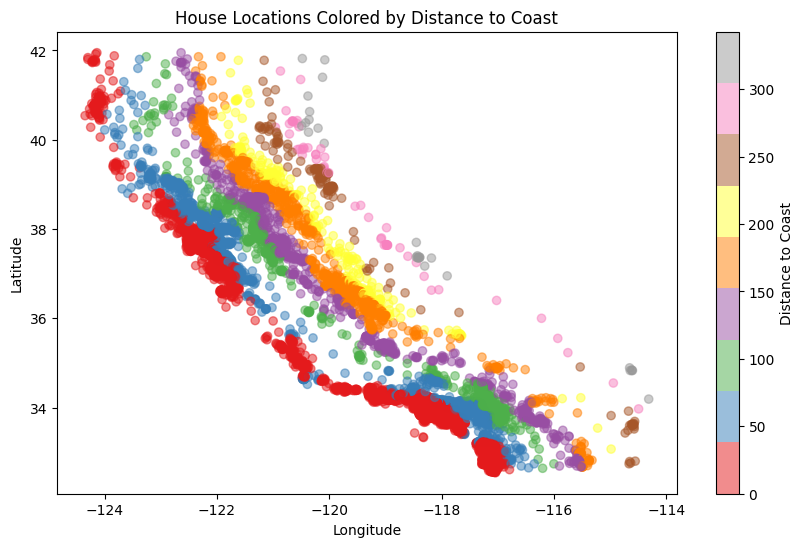

In [31]:
# we need to check if the fuction calculates right,
# we will visualize the results using scatterplot,
# as you can see on the plot, function works well, we can clearly see layers showing different distances:

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['distance_to_coast'], cmap='Set1', alpha=0.5)
plt.colorbar(label="Distance to Coast")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Locations Colored by Distance to Coast")
plt.show()


In [32]:
# Group by 'distance to coast' and 'ocean_proximity', then calculate the median of 'distance'
result = df.groupby(['distance_to_coast', 'ocean_proximity'])['distance_to_coast'].median().reset_index(name='median_distance')

# Display the result
print(result)

      distance_to_coast ocean_proximity  median_distance
0                  0.00       <1H OCEAN             0.00
1                  0.00        NEAR BAY             0.00
2                  0.00      NEAR OCEAN             0.00
3                  0.89      NEAR OCEAN             0.89
4                  0.92       <1H OCEAN             0.92
...                 ...             ...              ...
8165             327.17          INLAND           327.17
8166             327.71          INLAND           327.71
8167             329.72          INLAND           329.72
8168             334.59          INLAND           334.59
8169             342.61          INLAND           342.61

[8170 rows x 3 columns]


In [33]:
# now we can drop longitude and latitude and use the rest for our linear regression model:
df_1 = df.drop(["latitude","longitude","ocean_proximity"], axis=1)
# now we can drop the "ocean_proximity" column:


### Define X and y -variables

In [34]:
# X -> use everything else except, the target:
X = df_1.drop("median_house_value", axis=1)

# our target variable is y
y = df_1['median_house_value']

###  Next rest, train/test/split. model, metrics, etc.

In [35]:
# create train/test split with scikit-learn's helper function
# random_state is optional, you can lock down the randomness for same results everytime
# this is sometimes helpful when you want to minimize randomness in order to maximize optimizations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Initialize the LinearRegression -model and fit the data in (start training)

In [36]:
# create an empty linear regression model
# and fit it with our data (fit => start training with the data)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
intercept = model.intercept_

# this will be a list of variables (to support multiple linear regression)
# the slopes of the different variables in the linear regression formula
coefs = model.coef_

# if you want to have a nice table of different variable values:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
housing_median_age,781.698204
total_rooms,-12.934980
total_bedrooms,125.183271
population,-48.982539
households,89.580871
median_income,38420.904296
distance_to_coast,-522.182051


### Error and performance metrics

In [38]:
 # create test predictions based on the earlier test dataset
# we reserved out from the original dataset 
# this data has never been seen by the model by now
predictions = model.predict(X_test)

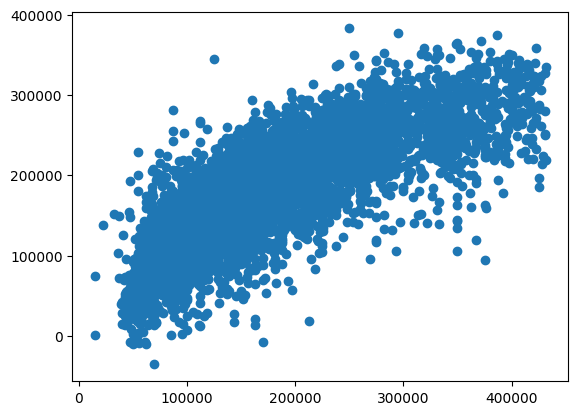

In [39]:
# let's plot how far the predictions are from the real true y-values
# in the test dataset

# if these values follow a diagonal line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
plt.scatter(y_test, predictions)
plt.show()

In [46]:
# save the current model into a file so we can move
# this model into another application 
from joblib import dump
dump(model, "linear_model_2.joblib")

['linear_model_2.joblib']

In [40]:
# NOTE! Change the units so that they match with your dataset's target variable
# for example, if your model is predicting Centigrades (C), don't use $-signs 
# in the metrics

# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
42072.05 $

MSE
2994776647.91 $^2

RMSE:
54724.55 $

R-squared:
0.61


In [41]:
# OPTIONAL! But this might be useful when you want to compare
# how off the model is in a relative sense

# basically calculate the error value divided by average target variable value

mae_percentage = metrics.mean_absolute_error(y_test, predictions) / df['median_house_value'].mean()
mae_percentage = round(mae_percentage, 2) * 100
print(f"MAE difference in % towards average: {mae_percentage} %")

rmse_percentage = np.sqrt(metrics.mean_squared_error(y_test, predictions)) / df['median_house_value'].mean()
rmse_percentage = round(rmse_percentage, 2) * 100
print(f"RMSE difference in % towards average: {rmse_percentage} %")

MAE difference in % towards average: 23.0 %
RMSE difference in % towards average: 30.0 %


C:\Users\svetl\AppData\Local\Temp\ipykernel_14420\3920156057.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


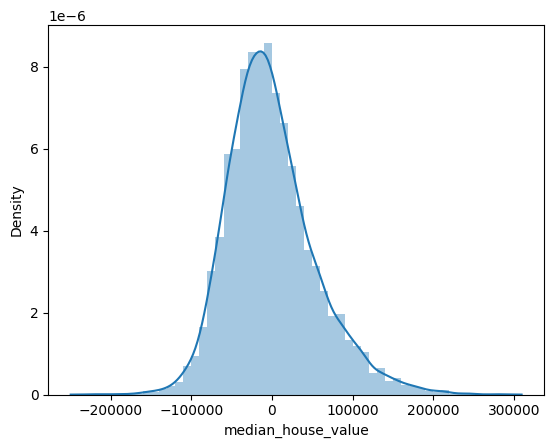

In [42]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

In [43]:
df_1.head(1)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,distance_to_coast
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,19.65


In [44]:
 # usually in a GUI application
# we save the earlier model-object into a file (using joblib-module)
# and in a separate GUI-application => we load up the saved model from the file
# and use the model just like here below:

# map all the variables from the user
# into a Python dictionary
# the variable names have to match with the original dataset
tester_row = {
    "housing_median_age": 50,
    "total_rooms": 500,
    "total_bedrooms": 70,
    "population": 300,
    "households": 50,	
    "median_income": 8.4567, 
    "distance_to_coast":1
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [45]:
# get the output/result/answer from the model
# based on the user's new data (from above code cell)
result = model.predict(tester_row)[0]

print()
print(f"Predicted house price with given parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted house price with given parameters:
402827.02 $
----------------
